# Data Cleaning and Transformation Test

Use file `./ref/sample_user_data.csv` for input

Use `pandas` lib or other lib if you want

Write your code and display the result in specific cell

In [1]:
import pandas as pd

In [2]:
# read csv file

# df = pd.read_csv("./ref/sample_user_data.csv")
df = pd.read_csv("/app/data/sample_user_data.csv") # file path in container
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    29 non-null     int64  
 1   name       29 non-null     object 
 2   age        26 non-null     float64
 3   join_date  27 non-null     object 
 4   salary     29 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


,user_id,name,age,join_date,salary
0,1,John,28.0,2023-02-01,50000
1,2,Alice,NaN,2023-02-02,52000
2,3,Bob,34.0,02/03/2023,49000
3,3,Bob,34.0,2023-03-02,49000
4,4,Emma,45.0,NaN,47000
5,5,Grek,32.0,NaN,23000.32
6,6,allen,26.0,2023-09-23,30000
7,7,Allen,26.0,2023-09-23,30000
8,8,chris,28.0,2020-11-13,"35,000.25"
9,9,Bob,33.0,2023-04-02,49000


### Question 1
There're data quality issues, such as outliers, null values, and incorrect data types.  

1. Validate fields.
2. Clean data by handling missing values.
3. Deduplicate record (if any).
4. Standardize any inconsistent data (e.g., date formats).


There're several conditions,
1.  Replace NaN in age value with "-"
2.  Format join_date to date type.
    -   YYYY-MM-DD i.e. 2024-11-03
    -   DD/MM/YYYY i.e. 03/12/2023
    -   remove NaN value
3. Name should be captitalized.



#### Example Data Quality Checks:
- Identify outliers in numerical fields (e.g., ages > 100).
- Ensure no future dates in a date column.
- user_id not be empty




In [3]:
# Write you code and display question 1 result here.


#### EDA

In [4]:
# column 'user_id'
# ดูค่าที่ซ้ำ
duplicates = df['user_id'].duplicated().sum()
print(f"Duplicate user_id: {duplicates}")

# ตรวจสอบค่าว่าง
missing = df['user_id'].isna().sum()
print(f"Missing user_id: {missing}")


Duplicate user_id: 6
Missing user_id: 0


Missing age: 3
    user_id  name    age   join_date  salary
25       22  Toby  134.0  2023-03-02  149000
27       24   Gin  940.0  2003-03-02  149000


<Axes: >

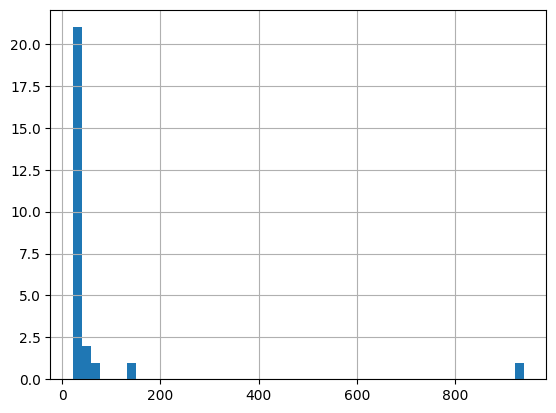

In [5]:
# column 'age'
# Missing Values
missing_age = df['age'].isna().sum()
print(f"Missing age: {missing_age}")

# Outliers
outliers = df[df['age'] > 100]
print(outliers)

# Distribution
df['age'].hist(bins=50)


In [6]:
# Column 'join_date'
# Missing Values
missing_join_date = df['join_date'].isna().sum()
print(f"Missing join_date: {missing_join_date}")

# แปลงคอลัมน์เป็น datetime
df['join_date'] = pd.to_datetime(df['join_date'], errors='coerce')

# วันที่ในอนาคต
future_dates = df[df['join_date'] > pd.Timestamp.now()]
print(f"Future join_date: {future_dates}")


Missing join_date: 2
Future join_date:     user_id   name   age  join_date  salary
26       23    Vin  40.0 2223-03-02  148000
28       25  james  60.0 2043-03-02  169000


In [7]:
# column 'name'
# ตรวจสอบ Missing Values ในคอลัมน์ name
missing_name = df['name'].isna().sum()
print(f"Missing name: {missing_name}")

# กรองค่าในคอลัมน์ name ที่ไม่ตรงตามเงื่อนไข (ขึ้นต้นด้วยพิมพ์ใหญ่ และตัวที่เหลือพิมพ์เล็ก)
invalid_names = df[~df['name'].str.match(r'^[A-Z][a-z]*$', na=False)]

# แสดงผลข้อมูลที่ไม่ตรงเงื่อนไข
print("Invalid names (not capitalized correctly):")
print(invalid_names['name'])


Missing name: 0
Invalid names (not capitalized correctly):
6      allen
8      chris
22       BOB
23    muller
24      MIke
28     james
Name: name, dtype: object


Missing salary: 0
Empty DataFrame
Columns: [user_id, name, age, join_date, salary]
Index: []


<Axes: >

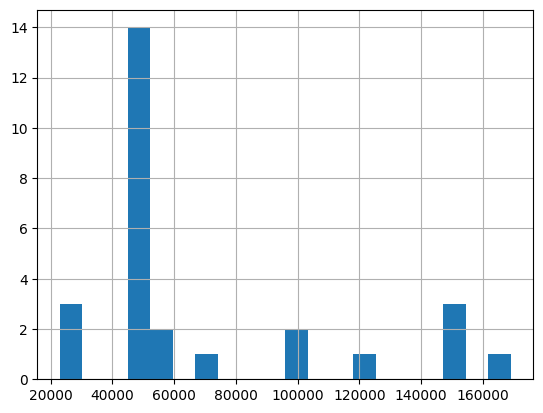

In [8]:
# Column 'salary'
# Missing Values
missing_salary = df['salary'].isna().sum()
print(f"Missing salary: {missing_salary}")

# Outliers
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
outliers_salary = df[df['salary'] < 0]
print(outliers_salary)

# Distribution
df['salary'].hist(bins=20)


#### Transform

In [9]:
# ฟังก์ชันจัดการค่าของ salary
def process_salary(value):
    try:
        # หากเป็นตัวเลข (numeric) ให้แปลงโดยตรง
        if isinstance(value, (int, float)):
            return float(value)
        # หากเป็นข้อความ (string) ให้ลบ ',' และแปลงเป็น float
        elif isinstance(value, str):
            return float(value.replace(',', '').strip())
        # กรณีอื่นๆ คืนค่า NaN
        return float('nan')
    except (ValueError, AttributeError):
        return float('nan')


In [10]:
# Function แก้เลขปีใน join_date
from datetime import datetime

# ดึงวันที่ปัจจุบัน
current_date = datetime.now()

# ฟังก์ชันแก้ไขปีของ join_date
def fix_future_date(date):
    if date > current_date:  # ตรวจสอบว่ามีวันที่ในอนาคต
        return date.replace(year=2023)  # เปลี่ยนปีเป็น 2023
    return date  # ถ้าไม่ใช่วันที่ในอนาคต ให้คงไว้เหมือนเดิม

In [11]:
df = pd.read_csv("/app/data/sample_user_data.csv")

# 1. Remove rows ที่ 'join_date' เป็น NaN
df = df[df['join_date'].notna()]

# 2. ทำ 'join_date' ให้เป็นประเภท datetime
df['join_date'] = pd.to_datetime(df['join_date'], format='%Y-%m-%d', errors='coerce').fillna(
    pd.to_datetime(df['join_date'], format='%d/%m/%Y', errors='coerce')
)

# 3. Replace ',' in 'salary' and convert to float
# ใช้ process_salary ผ่าน apply + lambda
df['salary'] = df['salary'].apply(lambda x: process_salary(x))

# 4. Transform 'name' to Capitalized format
df['name'] = df['name'].str.capitalize()

# 5. Drop duplicated rows based on 'user_id' โดยพิจารณาว่าถ้า 'user_id' ต่างกันหมายถึงบุคคลคนละคนกัน
df = df.drop_duplicates(subset='user_id', keep='first')

# 6. Replace NaN in 'age' with '-' (ตามที่โจทย์สั่ง)
df['age'] = df['age'].fillna("-")

# 7. Apply ฟังก์ชันกับคอลัมน์ join_date เพื่อแก้ไขเลขปีไม่ให้เป็น future (โจทย์ไม่ได้กำหนด แต่สมมุติเหตุการณ์เอง)
df['join_date'] = df['join_date'].apply(fix_future_date)

# 8. 'user_id' not be empty
df = df[ df['user_id'].notna() ]

# 9. Clean invalid data in 'age' เพื่อให้ 'age' เป็น integer และตรงตาม Data Quality
# 9.1 กรองค่า age ที่เป็นตัวเลขและอยู่ในช่วง 0 < age <= 100 เพื่อหาค่า Median 
median_age = df[(df['age'] != "-") & (df['age'].apply(lambda x: isinstance(x, (int, float)) and 0 < x <= 100))]['age'].median()
# 9.2 แทน "-" และค่าที่ไม่สมเหตุสมผล (age > 100) ด้วยค่า Median (โจทย์ไม่ได้กำหนด แต่สมมุติเหตุการณ์เอง)
df['age'] = df['age'].apply(
    lambda x: median_age if x == "-" or (isinstance(x, (int, float)) and (x > 100 or x <= 0)) else x
)
# 9.3 แปลง age ให้เป็น integer
df['age'] = df['age'].astype(int)

df


,user_id,name,age,join_date,salary
0,1,John,28,2023-02-01,50000.00
1,2,Alice,34,2023-02-02,52000.00
2,3,Bob,34,2023-03-02,49000.00
6,6,Allen,26,2023-09-23,30000.00
7,7,Allen,26,2023-09-23,30000.00
8,8,Chris,28,2020-11-13,35000.25
9,9,Bob,33,2023-04-02,49000.00
10,10,Bobb,34,2023-03-01,49000.00
12,12,Bobby,34,2023-03-01,49000.00
13,13,Bab,39,2023-02-02,49000.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 28
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   user_id    21 non-null     int64         
 1   name       21 non-null     object        
 2   age        21 non-null     int64         
 3   join_date  21 non-null     datetime64[ns]
 4   salary     21 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1008.0+ bytes


### Question 2
From question 1, display summary statistics on specific columns (mean, median, max, min, average)


In [13]:
# Write you code and display question 2 result here.
# คำนวณ Summary Statistics เฉพาะ age และ salary
summary_stats = df[['age', 'salary']].agg(['mean', 'median', 'max', 'min'])
summary_stats


,age,salary
mean,35.095238,75000.011905
median,34.000000,50000.000000
max,60.000000,169000.000000
min,22.000000,22000.000000


### Question 3
Display user record who has filled all data (data not be NaN, empty or "-")



In [14]:
# Write you code and display question 3 result here.
# ข้อมูลที่ผ่านการ process จากใน question 1 เรียบร้อยแล้ว
df

,user_id,name,age,join_date,salary
0,1,John,28,2023-02-01,50000.00
1,2,Alice,34,2023-02-02,52000.00
2,3,Bob,34,2023-03-02,49000.00
6,6,Allen,26,2023-09-23,30000.00
7,7,Allen,26,2023-09-23,30000.00
8,8,Chris,28,2020-11-13,35000.25
9,9,Bob,33,2023-04-02,49000.00
10,10,Bobb,34,2023-03-01,49000.00
12,12,Bobby,34,2023-03-01,49000.00
13,13,Bab,39,2023-02-02,49000.00


### Visualization


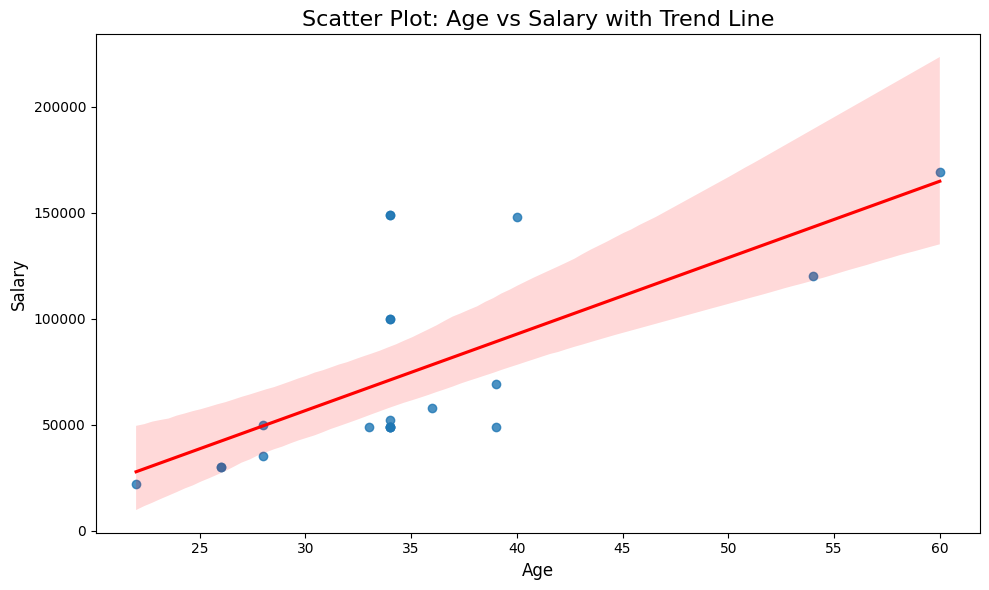

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot พร้อมเส้นแนวโน้มเชิงเส้น
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='age', y='salary', scatter=True, line_kws={"color": "red"})
plt.title('Scatter Plot: Age vs Salary with Trend Line', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Salary', fontsize=12)
plt.tight_layout()
plt.show()


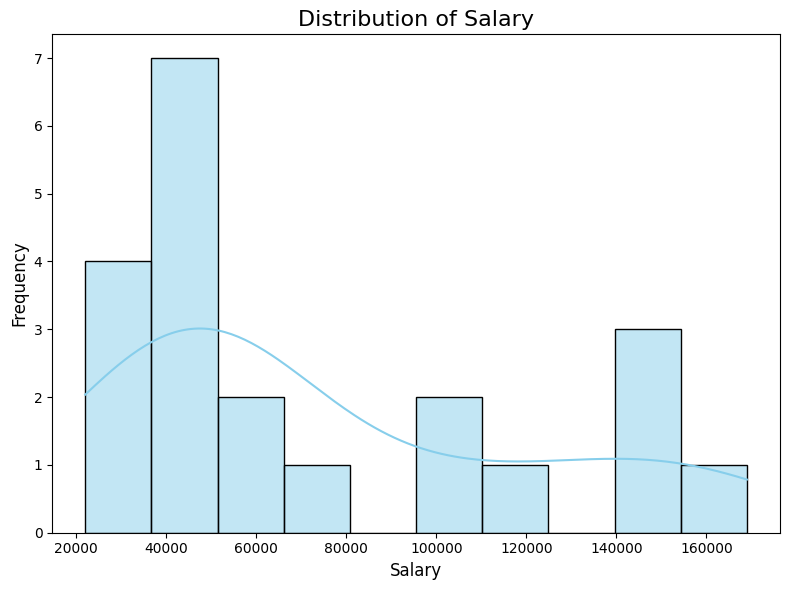

In [16]:
# Histogram: การกระจายตัวของเงินเดือน
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='salary', bins=10, kde=True, color='skyblue')
plt.title('Distribution of Salary', fontsize=16)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


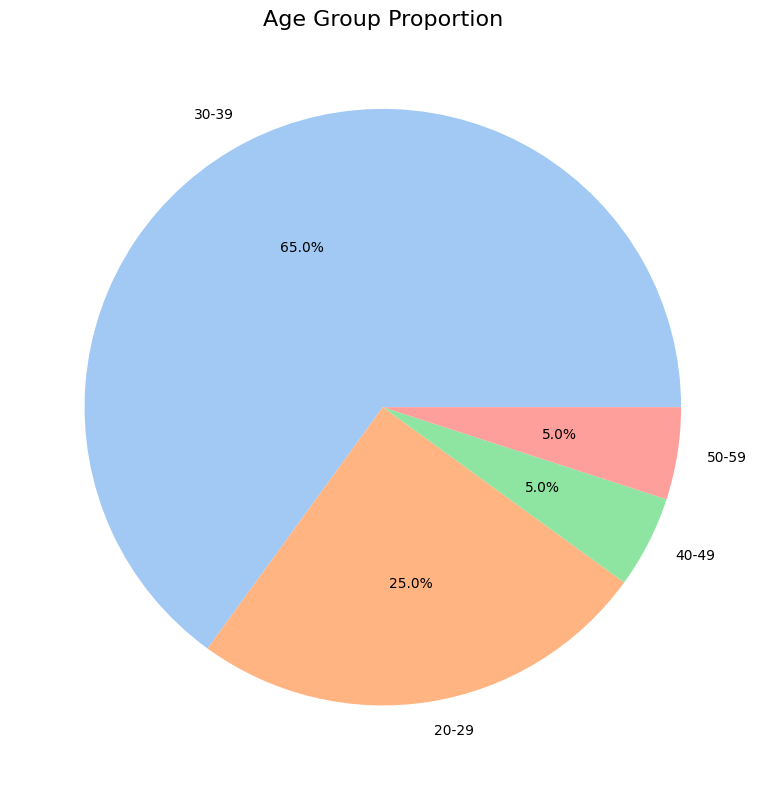

In [17]:
# กำหนดช่วงอายุเป็นกลุ่ม
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Pie chart: สัดส่วนผู้ใช้ตามช่วงอายุ
age_group_counts = df['age_group'].value_counts()
plt.figure(figsize=(8, 8))
age_group_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Age Group Proportion', fontsize=16)
plt.ylabel('')  # ไม่แสดง y-axis label
plt.tight_layout()
plt.show()


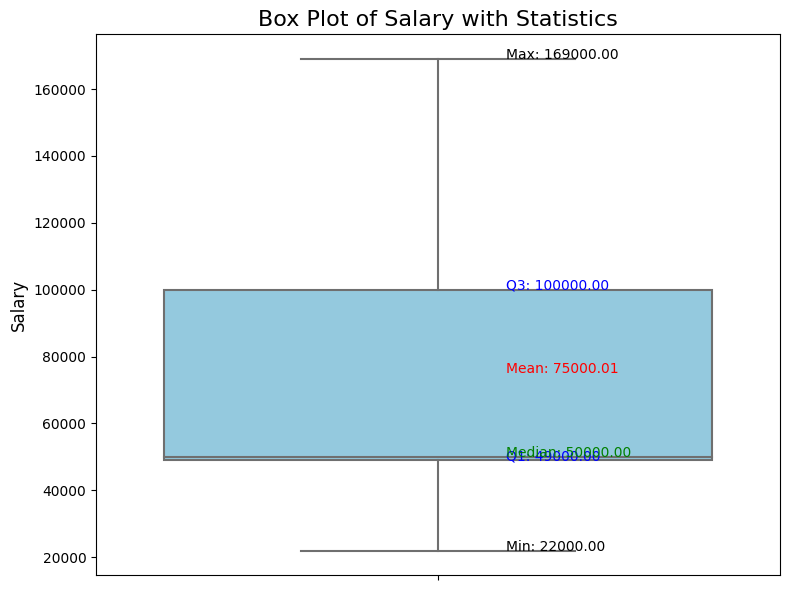

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# คำนวณค่าสถิติสำหรับ salary
stats = {
    'Min': df['salary'].min(),
    'Q1 (25%)': df['salary'].quantile(0.25),
    'Median': df['salary'].median(),
    'Q3 (75%)': df['salary'].quantile(0.75),
    'Max': df['salary'].max(),
    'Mean': df['salary'].mean()
}

# Box Plot: การกระจายตัวของเงินเดือน
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='salary', color='skyblue')

# เพิ่มค่าสถิติในกราฟ
plt.text(0.1, stats['Min'], f"Min: {stats['Min']:.2f}", color='black')
plt.text(0.1, stats['Q1 (25%)'], f"Q1: {stats['Q1 (25%)']:.2f}", color='blue')
plt.text(0.1, stats['Median'], f"Median: {stats['Median']:.2f}", color='green')
plt.text(0.1, stats['Q3 (75%)'], f"Q3: {stats['Q3 (75%)']:.2f}", color='blue')
plt.text(0.1, stats['Max'], f"Max: {stats['Max']:.2f}", color='black')
plt.text(0.1, stats['Mean'], f"Mean: {stats['Mean']:.2f}", color='red')

# ตั้งค่าชื่อกราฟและแกน
plt.title('Box Plot of Salary with Statistics', fontsize=16)
plt.ylabel('Salary', fontsize=12)
plt.tight_layout()
plt.show()
